# Lead Scoring Case Study

# <a id='3'>Step 1: Setting Up the Environment</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(100)

import sklearn
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#To convert scientific noations such as 1.5643639e+11 to 1564363967221.00
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

#To display all the columns
pd.set_option('display.max_columns', 100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <a id='3'>Step 2: Loading the 'Leads' CSV File</a>

Let us read the Leads file from same folder where the Python file is available

In [2]:
leads_original_df = pd.read_csv('Leads.csv')

In [3]:
#Top 5 rows of the dataframe
leads_original_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


# <a id='3'>Step 3: Checking the structure of the data</a>

## <a id='5-2'>3.1 Shape of the data set</a>

In [4]:
#Shape of the dataframe
print("Size of dataset:","\nNo. of Columns:",leads_original_df.shape[1],
      "\nNo. of Rows:",leads_original_df.shape[0])

Size of dataset: 
No. of Columns: 37 
No. of Rows: 9240


## <a id='5-2'>3.2 Information of the data set</a>

In [5]:
#Information on columns of the dataframe like Column names, their data types etc.
leads_original_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads_original_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.0000,9240.0000,9103.0000,9240.0000,9103.0000,5022.0000,5022.0000
mean,617188.4356,0.3854,3.4452,487.6983,2.3628,14.3063,16.3449
std,23405.9957,0.4867,4.8549,548.0215,2.1614,1.3867,1.8114
min,579533.0000,0.0000,0.0000,0.0000,0.0000,7.0000,11.0000
25%,596484.5000,0.0000,1.0000,12.0000,1.0000,14.0000,15.0000
50%,615479.0000,0.0000,3.0000,248.0000,2.0000,14.0000,16.0000
75%,637387.2500,1.0000,5.0000,936.0000,3.0000,15.0000,18.0000
max,660737.0000,1.0000,251.0000,2272.0000,55.0000,18.0000,20.0000


## <a id='5-2'>3.3 Column Names</a>

In [7]:
#List of columns names
leads_original_df.columns.tolist()

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

## <a id='5-2'>3.4 Count of Numerical and Categorical columns</a>

In [8]:
numeric_columns = leads_original_df.select_dtypes(include = [np.number])
categorical_columns = leads_original_df.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical variables in the data set'.\
     format(numeric_columns.shape[1], categorical_columns.shape[1]))

There are 7 numerical and 30 categorical variables in the data set


# <a id='3'>Step 4: Data Quality Check</a>

In [9]:
# Let's create a copy of the original data set
leads_revised_df = leads_original_df.copy()

## <a id='3'>4.1 Duplicate Value Check</a>

**Observations:**
- We can observe that there are no duplicates in columns: `Prospect ID` and `Lead Number`

In [10]:
#checking duplicates
print(sum(leads_revised_df.duplicated(subset = 'Prospect ID')) == 0)
print(sum(leads_revised_df.duplicated(subset = 'Lead Number')) == 0)

True
True


**`Prospect ID` is not required in this analysis as `Prospect ID` can be denoted as `Lead Number` as well. We will drop this variable.**

In [11]:
leads_revised_df = leads_revised_df.drop(['Prospect ID'], axis = 1)

## <a id='3'>4.2 Unique Values Count Check</a>

### <a id='3'>4.2.1 Columns with only One Unique value</a>

**Observation:** There are 5 columns which have only one unique values, so these variables don't show any variance and doesn't make any impact on conversion of leads.
- `Magazine`
- `Recieve More updates about the course`
- `Update me on Supply chain content`
- `Get updates on DM content`
- `I agree to pay the amount through cheque`

**We will drop above columns**

In [12]:
leads_revised_df.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [13]:
# Dropping the columns having only 1 value
leads_revised_df = leads_revised_df.drop(['Magazine', 'Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content', 'Get updates on DM Content', 
                            'I agree to pay the amount through cheque'], axis=1)

### <a id='3'>4.2.2 Columns with Two Unique values</a>

**Observations:** Most of the entries of the below columns are **'No'**. So, these columns doesn't make any impact on conversion of leads.

- `Do Not Email`
- `Do Not Call`
- `Search`
- `Newspaper Article`
- `X Education Forums`
- `Newspaper`
- `Digital Advertisement`
- `Through Recommendations`

**We will drop above columns**

Column: `A free copy of Mastering The Interview` have significant entries of Yes, so we will not be dropping this column at the moment and will do more analysis later on.

In [14]:
print(leads_revised_df['Newspaper Article'].value_counts())
print(leads_revised_df['X Education Forums'].value_counts())
print(leads_revised_df['Newspaper'].value_counts())
print(leads_revised_df['Digital Advertisement'].value_counts())
print(leads_revised_df['Through Recommendations'].value_counts())
print(leads_revised_df['Do Not Email'].value_counts())
print(leads_revised_df['Do Not Call'].value_counts())
print(leads_revised_df['Search'].value_counts())
print(leads_revised_df['A free copy of Mastering The Interview'].value_counts())

No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [15]:
# Dropping the above mentioned columns
leads_revised_df = leads_revised_df.drop(['Do Not Email', 'Do Not Call', 'Search',
                                          'Newspaper Article', 'X Education Forums',
                                          'Newspaper', 'Digital Advertisement',
                                          'Through Recommendations'], axis=1)

### <a id='3'>4.2.3 Columns with Three Unique values</a>

**Observations:**
- Most of the entries in column: `What matters most to you in choosing a course` is **'Better Career Prospects'**. So, the column is not making any impact on the conversion of leads. We will drop this column.

- Columns: `Asymmetrique Activity Index` and `Asymmetrique Profile Index` have significant different entries along with missing values. So we will not be dropping these columns at the moment and will do more analysis later on.

In [16]:
print(leads_revised_df['What matters most to you in choosing a course'].value_counts())
print(leads_revised_df['Asymmetrique Activity Index'].value_counts())
print(leads_revised_df['Asymmetrique Profile Index'].value_counts())

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64


In [17]:
# Dropping column: What matters most to you in choosing a course
leads_revised_df = leads_revised_df.drop(['What matters most to you in choosing a course'], axis=1)

In [18]:
leads_revised_df.shape

(9240, 22)

## <a id='3'>4.3 Derived Variables</a>

As `Total Time Spent on Website` is in minutes, we will convert the values in hours and then will be deriving a new variable: `Time Spent Above 1hr` where we will maintain 'Yes' if customer has spent more than 1 hour and 'No' if less than 1 hour.

In [19]:
# Lets convert minutes into hours
leads_revised_df['Total Time Spent on Website'] = round(leads_revised_df['Total Time Spent on Website']/60).astype(int)

In [20]:
# Deriving the new variable
leads_revised_df['Time Spent Above 1hr'] = leads_revised_df.apply(lambda row : 'Yes' if 
                                                                  row['Total Time Spent on Website'] >= 1 else 'No', axis=1)

In [21]:
leads_revised_df[['Total Time Spent on Website','Time Spent Above 1hr']].head()

,Total Time Spent on Website,Time Spent Above 1hr
0,0,No
1,11,Yes
2,26,Yes
3,5,Yes
4,24,Yes


In [22]:
# We will drop 'Total Time Spent on Website' 
#leads_revised_df = leads_revised_df.drop(['Total Time Spent on Website'], axis=1)

In [23]:
leads_revised_df.shape

(9240, 23)

## <a id='5-2'>4.4 Checking missing values percentages column wise</a>

In [24]:
missing_count = ((leads_revised_df.isnull().sum())/len(leads_revised_df))*100
missing_count = round(missing_count[missing_count > 0],4)
print(missing_count.sort_values(ascending = False))

Lead Quality                         51.5909
Asymmetrique Profile Score           45.6494
Asymmetrique Activity Score          45.6494
Asymmetrique Profile Index           45.6494
Asymmetrique Activity Index          45.6494
Tags                                 36.2879
Lead Profile                         29.3182
What is your current occupation      29.1126
Country                              26.6342
How did you hear about X Education   23.8853
Specialization                       15.5628
City                                 15.3680
Page Views Per Visit                  1.4827
TotalVisits                           1.4827
Last Activity                         1.1147
Lead Source                           0.3896
dtype: float64


## <a id='5-2'>4.4 Missing Values Treatment</a>

### Random Impute function

We will use the `random_impute` function to impute the missing values of the column where we have uniform distribution of the unique values in that column.

In [25]:
def random_impute(col):
    
    leads_revised_df[col] = leads_revised_df[col].fillna('NA')
    val = leads_revised_df[col].unique()
    val = np.delete(val,np.where(val == 'NA'))
    leads_revised_df[col] = leads_revised_df.apply(lambda row : random.choice(val) if row[col] == 'NA' else row[col],axis=1)

### <a id='5-1'>4.4.1 Variable: `Lead Quality`</a>

We can see that the unique values are uniformly distributed. So, we will use random impute function to impute the missing values.

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

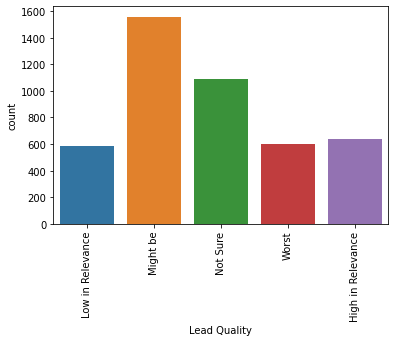

In [26]:
print(leads_revised_df['Lead Quality'].value_counts(dropna=False))
sns.countplot(leads_revised_df['Lead Quality'])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

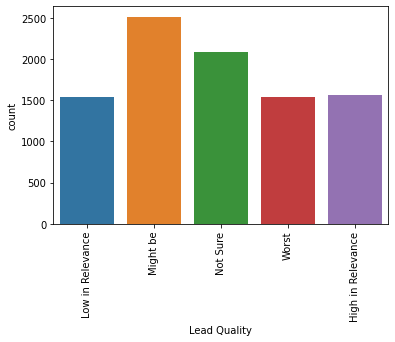

In [27]:
# Imputing the missing values using random_impute function
random_impute('Lead Quality')
sns.countplot(leads_revised_df['Lead Quality'])
plt.xticks(rotation = 90)

### <a id='5-1'>4.4.2 Variables:</a>
- `Asymmetrique Activity Index`
- `Asymmetrique Profile Index`
- `Asymmetrique Activity Score`
- `Asymmetrique Profile Score`

**Observation:**
- As these index and score are assigned to the customers based on their activity and profile
- Also, there is too much variation so its not reliable to impute 45% missing values.

**We will drop these variables**

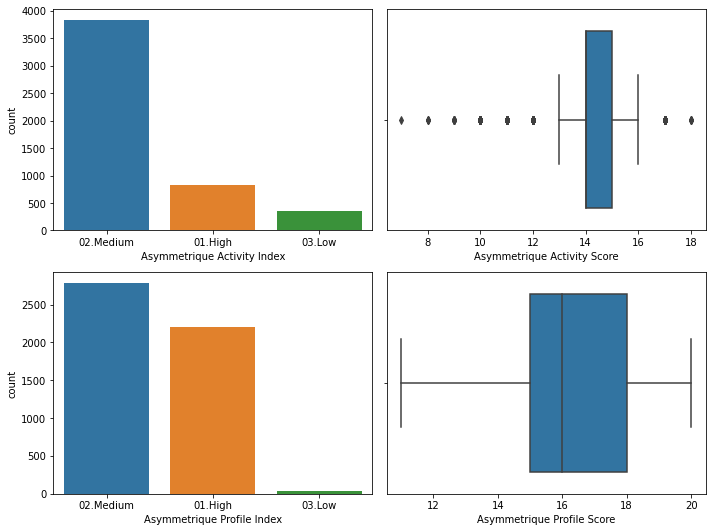

In [28]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(leads_revised_df['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(leads_revised_df['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(leads_revised_df['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(leads_revised_df['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [29]:
leads_revised_df = leads_revised_df.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score',
                                          'Asymmetrique Profile Index', 'Asymmetrique Profile Score'],1)
leads_revised_df.shape

(9240, 19)

In [30]:
missing_count = ((leads_revised_df.isnull().sum())/len(leads_revised_df))*100
missing_count = round(missing_count[missing_count > 0],2)
print(missing_count.sort_values(ascending=False))

Tags                                 36.2900
Lead Profile                         29.3200
What is your current occupation      29.1100
Country                              26.6300
How did you hear about X Education   23.8900
Specialization                       15.5600
City                                 15.3700
Page Views Per Visit                  1.4800
TotalVisits                           1.4800
Last Activity                         1.1100
Lead Source                           0.3900
dtype: float64


### <a id='5-1'>4.4.3 Variable: `Tags`</a>

**Observation:**

There are approx. 36% of Null values available in this variable and from the below plot, we can see many tags are associated with very few leads. So, we club all these tags into one tag i.e., 'Other_Tags' and then will use random_impute function to impute the null values.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

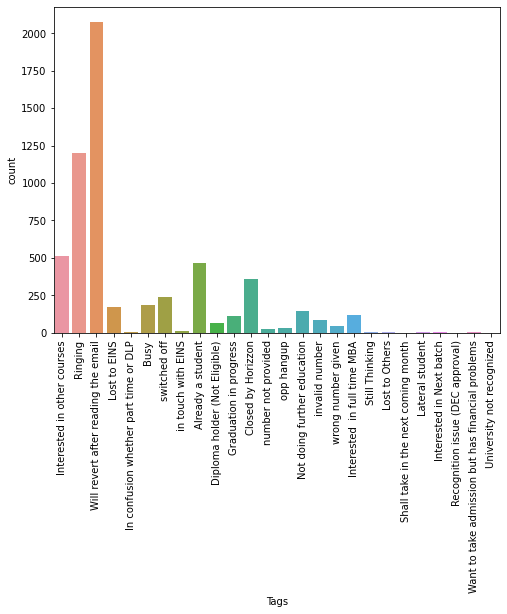

In [31]:
fig = plt.subplots(figsize = (8,6))
sns.countplot(leads_revised_df['Tags'])
plt.xticks(rotation = 90)

In [32]:
# Let's keep considerable Tags as such and club all others to "Other_Tags"
leads_revised_df['Tags'] = leads_revised_df['Tags'].replace(
                                            ['invalid number', 'Diploma holder (Not Eligible)', 'opp hangup'
                                             'wrong number given', 'number not provided','Lost to Others',
                                             'in touch with EINS', 'Still Thinking', 'Lateral student'
                                             'Want to take admission but has financial problems',
                                             'In confusion whether part time or DLP','Interested in Next batch',
                                             'Shall take in the next coming month','University not recognized',
                                             'Recognition issue (DEC approval)'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

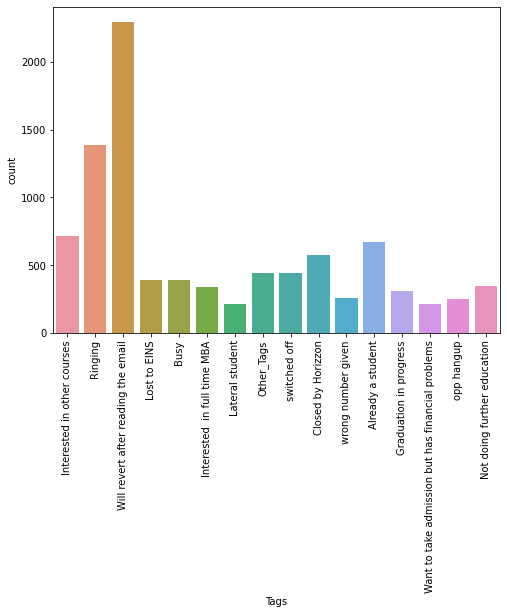

In [33]:
# Imputing the missing values using random_impute function
random_impute('Tags')
fig = plt.subplots(figsize = (8,6))
sns.countplot(leads_revised_df['Tags'])
plt.xticks(rotation = 90)

### <a id='5-1'>4.4.4 Variable: `Lead Profile`</a>

**Observation:**
- Approx. 45% entries are 'Select' which is as good as Null values.
- We will convert the 'Select' entries to Null values and then will use random_impute function to impute the Null values

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

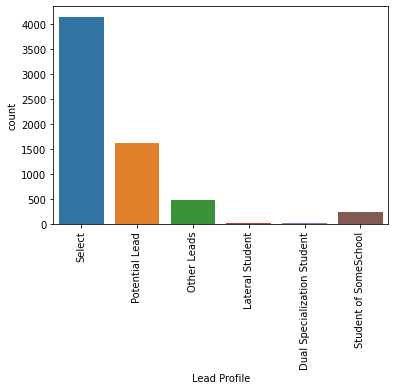

In [34]:
print(leads_revised_df['Lead Profile'].value_counts(dropna=False))
sns.countplot(leads_revised_df['Lead Profile'])
plt.xticks(rotation = 90)

In [35]:
# Converting the 'Select' entries to null values
leads_revised_df['Lead Profile'] = leads_revised_df['Lead Profile'].replace('Select', np.nan)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

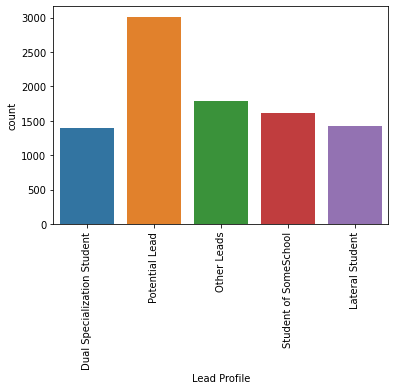

In [36]:
# Imputing the missing values using random_impute function
random_impute('Lead Profile')
sns.countplot(leads_revised_df['Lead Profile'])
plt.xticks(rotation = 90)

### <a id='5-1'>4.4.5 Variable: `What is your current occupation`</a>

**Observation: 85% of the data has occupation as 'Unemployed'. So assuming that customers who has not mentioned the occupation will also fall under same category, so we will impute the null values with 'Unemployed'.**

In [37]:
# Let's rename the column as Occupation
leads_revised_df = leads_revised_df.rename(columns={"What is your current occupation":"Occupation"})

In [38]:
leads_revised_df['Occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: Occupation, dtype: object

In [39]:
# Imputing the missing values with 'Unemployed'
leads_revised_df['Occupation'] = leads_revised_df['Occupation'].fillna('Unemployed')

### <a id='5-1'>4.4.6 Variable: `Country`</a>

**Observation: 96% of the data has country as 'India'. So we will impute the null values with 'India'.**

In [40]:
leads_revised_df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [41]:
# Imputing the missing values with 'India'
leads_revised_df["Country"]=leads_revised_df["Country"].fillna("India")

### <a id='5-1'>4.4.7 Variable: `How did you hear about X Education`</a>

**Observation:**
- Approx. 55% entries are 'Select' which is as good as Null values.
- We will convert the 'Select' entries to Null values and then will use "random_impute" function to impute the Null values

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

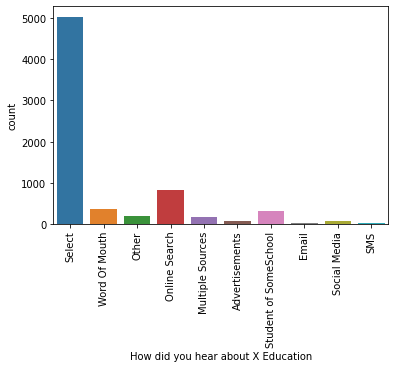

In [42]:
print(leads_revised_df['How did you hear about X Education'].value_counts(dropna=False))
sns.countplot(leads_revised_df['How did you hear about X Education'])
plt.xticks(rotation = 90)

In [43]:
# Converting the 'Select' entries to null values
leads_revised_df['How did you hear about X Education'] = leads_revised_df['How did you hear about X Education'].replace('Select', np.nan)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

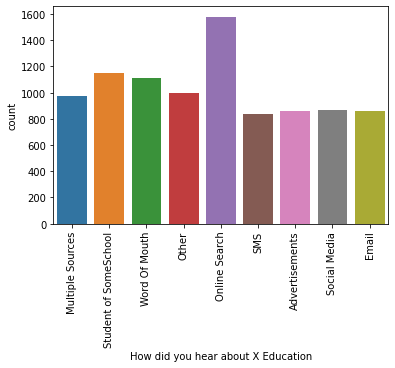

In [44]:
# Imputing the missing values using random_impute function
random_impute('How did you hear about X Education')
sns.countplot(leads_revised_df['How did you hear about X Education'])
plt.xticks(rotation = 90)

### <a id='5-1'>4.4.8 Variable: ``Specialization``</a>

**Observation:**
- Approx. 21% entries are 'Select' which is as good as Null values. So, we will convert the 'Select' entries to Null values.
- Its possible that lead has not entered any specialization if his/her option is not availabe on the list, may not have any specialization or is a student.
- So, we will impute the null values with a new category: "Others".
- If the lead's specialization is not available in the list then we should provide the option to manually maintain the specicalization.

In [45]:
leads_revised_df['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

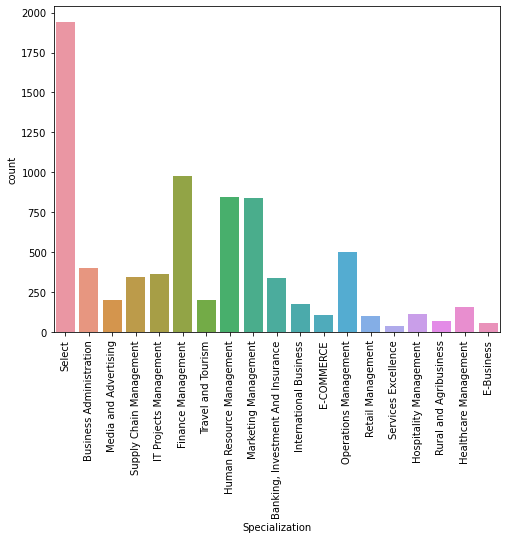

In [46]:
fig = plt.subplots(figsize = (8,6))
sns.countplot(x= 'Specialization', data = leads_revised_df)
plt.xticks(rotation=90)

In [47]:
#Converting 'Select' to NaN
leads_revised_df['Specialization'] = leads_revised_df['Specialization'].replace('Select', np.nan)

In [48]:
# Imputing Null values to new category: 'Others'
leads_revised_df['Specialization'] = leads_revised_df['Specialization'].replace(np.nan, 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

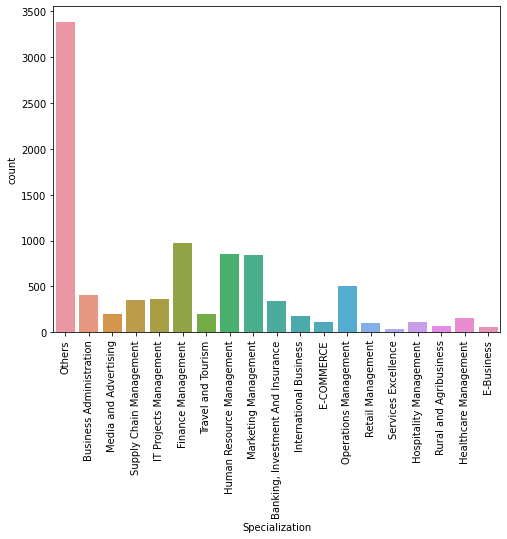

In [49]:
fig = plt.subplots(figsize = (8,6))
sns.countplot(leads_revised_df['Specialization'])
plt.xticks(rotation = 90)

### <a id='5-1'>4.4.9 Variable: `City`</a>

**Observation: Around 60% of records have city as 'Mumbai' or 'Nearby Mumbai only', so we will impute the null values with Mumbai**

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

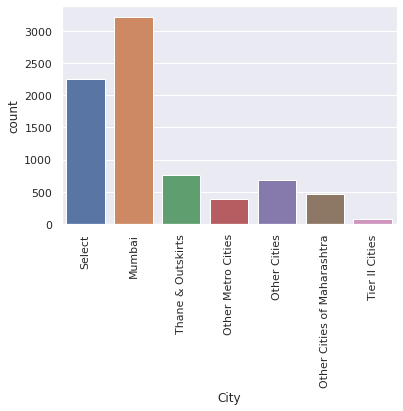

In [50]:
print(leads_revised_df['City'].value_counts(dropna=False))
sns.set(style="darkgrid")
sns.countplot(leads_revised_df['City'])
plt.xticks(rotation = 90)

In [51]:
#Converting 'Select' to NaN
leads_revised_df['City'] = leads_revised_df['City'].replace('Select', np.nan)

In [52]:
# Imputing the missing values with 'Mumbai'
leads_revised_df["City"]=leads_revised_df["City"].fillna("Mumbai")

### <a id='5-1'>4.4.10 Variable: `Lead Source`</a>

**Observation: Missing values are less than 1 percent. So, we will impute the null values with most frequent value i.e., 'Google'**

In [53]:
leads_revised_df['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
youtubechannel          1
blog                    1
testone                 1
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
Name: Lead Source, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

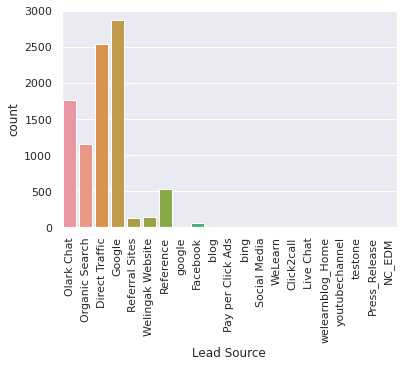

In [54]:
print(leads_revised_df['Lead Source'].value_counts(dropna=False))
sns.set(style="darkgrid")
sns.countplot(leads_revised_df['Lead Source'])
plt.xticks(rotation = 90)

In [55]:
# We have two similar values: google and Google. So, replacing 'google' with 'Google'
leads_revised_df['Lead Source'] = leads_revised_df['Lead Source'].replace(['google'], 'Google')

In [56]:
# Imputing the null values with 'Google'
leads_revised_df["Lead Source"]=leads_revised_df["Lead Source"].fillna("Google")

### Let's see the missing value count again

In [57]:
missing_count = ((leads_revised_df.isnull().sum())/len(leads_revised_df))*100
missing_count = round(missing_count[missing_count > 0],2)
print(missing_count.sort_values(ascending=False))

Page Views Per Visit   1.4800
TotalVisits            1.4800
Last Activity          1.1100
dtype: float64


**Rest of the missing values are under 2% so we can drop these rows.**

In [58]:
leads_revised_df.dropna(inplace = True)
leads_revised_df.shape

(9103, 19)

**There are no null values in the dataset.**

In [59]:
missing_count = ((leads_revised_df.isnull().sum())/len(leads_revised_df))*100
missing_count

Lead Number                              0.0000
Lead Origin                              0.0000
Lead Source                              0.0000
Converted                                0.0000
TotalVisits                              0.0000
Total Time Spent on Website              0.0000
Page Views Per Visit                     0.0000
Last Activity                            0.0000
Country                                  0.0000
Specialization                           0.0000
How did you hear about X Education       0.0000
Occupation                               0.0000
Tags                                     0.0000
Lead Quality                             0.0000
Lead Profile                             0.0000
City                                     0.0000
A free copy of Mastering The Interview   0.0000
Last Notable Activity                    0.0000
Time Spent Above 1hr                     0.0000
dtype: float64

In [60]:
numeric_columns = leads_revised_df.select_dtypes(include = [np.number])
categorical_columns = leads_revised_df.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical variables in the data set'.\
     format(numeric_columns.shape[1], categorical_columns.shape[1]))

There are 5 numerical and 14 categorical variables in the data set


In [61]:
leads_revised_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'Occupation', 'Tags', 'Lead Quality', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Time Spent Above 1hr'],
      dtype='object')

# <a id='5'>Step 5: Analysis of Outliers</a>

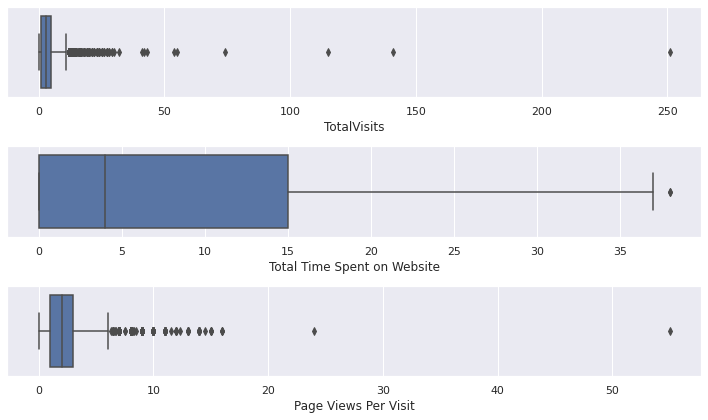

In [62]:
fig, ax = plt.subplots(3,1, figsize = (10,6))
plt1 = sns.boxplot(x = leads_revised_df['TotalVisits'], ax = ax[0])
plt2 = sns.boxplot(x = leads_revised_df['Total Time Spent on Website'], ax = ax[1] )
plt3 = sns.boxplot(x = leads_revised_df['Page Views Per Visit'], ax = ax[2])
plt.tight_layout()

In [63]:
# Getting the percentile of above three columns to identify the outliers.
percentile_values = leads_revised_df[['TotalVisits', 'Page Views Per Visit']].describe(percentiles = [0.05,
                                                                    0.25, 0.5, 0.75, 0.95, 0.97, 0.99])
percentile_values

,TotalVisits,Page Views Per Visit
count,9103.0000,9103.0000
mean,3.4452,2.3628
std,4.8549,2.1614
min,0.0000,0.0000
5%,0.0000,0.0000
25%,1.0000,1.0000
50%,3.0000,2.0000
75%,5.0000,3.0000
95%,10.0000,6.0000
97%,11.0000,7.0000


In [64]:
# For Total Visits
Q3 = leads_revised_df['TotalVisits'].quantile(0.95)
leads_revised_df = leads_revised_df[(leads_revised_df['TotalVisits'] <= Q3)]

In [65]:
# For Total Time Spent on Website
Q3 = leads_revised_df['Total Time Spent on Website'].quantile(0.95)
leads_revised_df = leads_revised_df[(leads_revised_df['Total Time Spent on Website'] <= Q3)]

In [66]:
# For Page Views Per Visit
Q3 = leads_revised_df['Page Views Per Visit'].quantile(0.95)
leads_revised_df = leads_revised_df[(leads_revised_df['Page Views Per Visit'] <= Q3)]

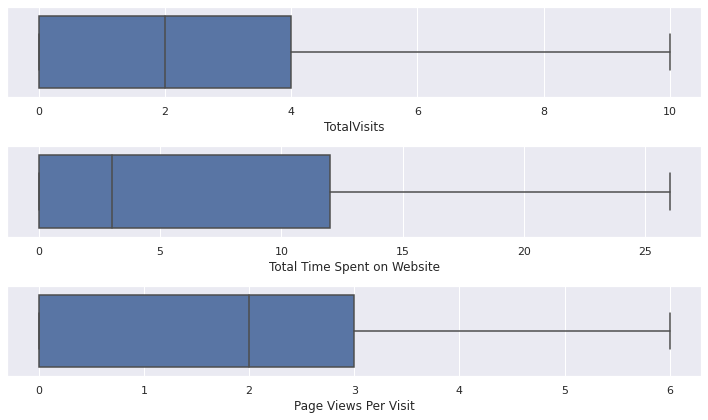

In [67]:
fig, ax = plt.subplots(3,1, figsize = (10,6))
plt1 = sns.boxplot(x = leads_revised_df['TotalVisits'], ax = ax[0])
plt2 = sns.boxplot(x = leads_revised_df['Total Time Spent on Website'], ax = ax[1] )
plt3 = sns.boxplot(x = leads_revised_df['Page Views Per Visit'], ax = ax[2])
plt.tight_layout()

In [68]:
# Let's check the shape of the dataframe after outlier treatment
leads_revised_df.shape

(8133, 19)

# <a id='5'>Step 6: Data Analysis</a>

## <a id='5-1'>6.1 Analysis of variable: `Converted`</a>

**Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).**

In [69]:
Conversion_rate = (sum(leads_revised_df['Converted'])/len(leads_revised_df['Converted'].index))*100
print("The conversion rate of leads is: ", round(Conversion_rate,2))

The conversion rate of leads is:  36.48


## <a id='5-1'>6.2 Analysis of variable: `Lead Origin`</a>

**Observations:**
- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.

**To improve overall lead conversion rate, we need to focus more on improving lead converion of 'API' and 'Landing Page Submission' origin and generate more leads from 'Lead Add Form'.**

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

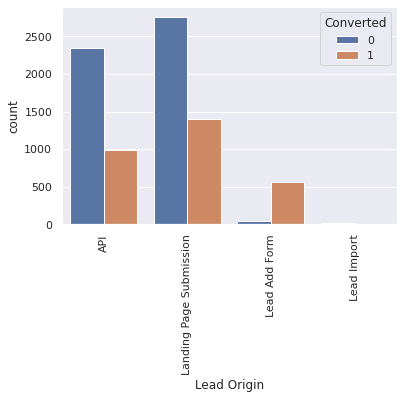

In [70]:
fig = plt.subplots(figsize = (6,4))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

## <a id='5-1'>6.3 Analysis of variable: `Lead Source`</a>

**Observations:**
- We can see that there are various Sources which have just 1 or 2 leads, hence for better analysis we will combine all these sources to one category: 'Miscellaneous'.
- Sources: 'Google' and 'Direct traffic' generates maximum number of leads.
- Conversion Rate of leads through sources: 'Reference' and 'Welingak website' is high.

**To improve overall lead conversion rate, focus should be on improving lead conversion of `Olark Chat`, `Organic Search`, `Direct Traffic`, and `Google` leads and generate more leads from `Reference` and `Welingak Website`.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

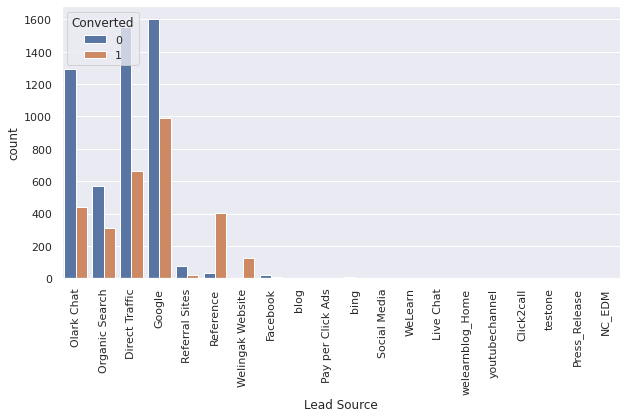

In [71]:
fig = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

In [72]:
leads_revised_df['Lead Source'] = leads_revised_df['Lead Source'].replace(['bing', 'Click2call', 'Live Chat',
                                                                           'Press_Release', 'Social Media',
                                                                           'testone', 'welearnblog_Home',
                                                                           'NC_EDM', 'Pay per Click Ads',
                                                                           'youtubechannel', 'blog', 
                                                                           'WeLearn'], 'Miscellaneous')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

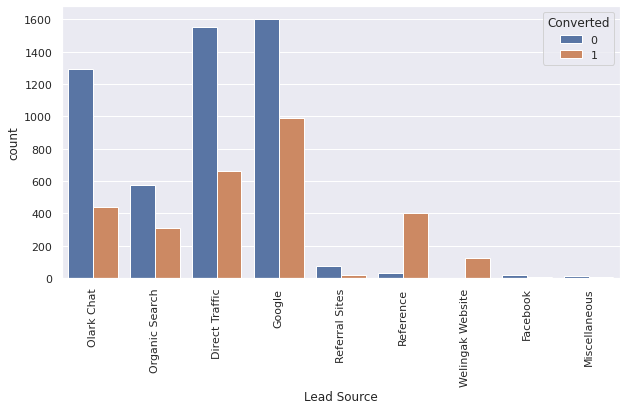

In [73]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

## <a id='5-1'>6.4 Analysis of variable: `Last Activity`</a>

**Observations:**
- We can see that there are various activities which have very few leads, hence for better analysis we will combine all these sources to one category: 'Others'.

- Most of the leads have 'Email Opened' as their last activity.
- Conversion Rate of leads with last activity as 'SMS Sent' is high.

**To improve overall lead conversion rate, focus should be on improving lead conversion of `Olark Chat Conversation`, and `Email Opened` leads.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

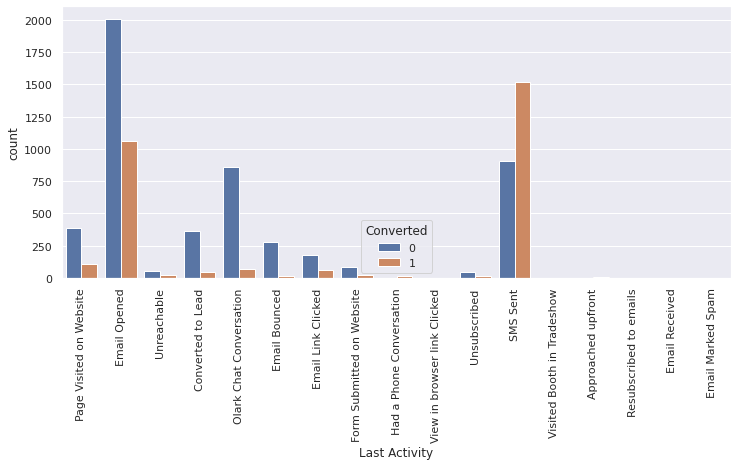

In [74]:
fig = plt.subplots(figsize = (12,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

In [75]:
# Let's keep considerable last activities as such and club all others to "Others"
leads_revised_df['Last Activity'] = leads_revised_df['Last Activity'].replace(['Visited Booth in Tradeshow', 
                                                                    'Approached upfront', 'Unreachable',
                                                                    'Resubscribed to emails',
                                                                    'Email Received', 'Email Marked Spam',
                                                                    'Unsubscribed', 'Had a Phone Conversation',
                                                                    'View in browser link Clicked'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

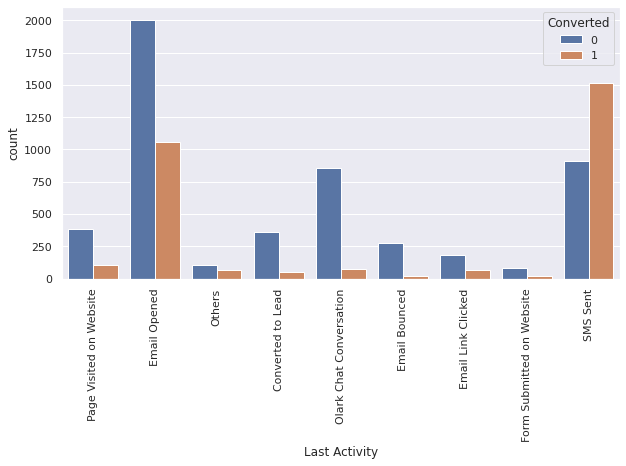

In [76]:
fig = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

## <a id='5-1'>6.5 Analysis of variable: `Country`</a>

**Observation: There are no countries other than 'India' where we have significant number of leads. So, this variable doesn't make any impact on overall conversion rate. We will drop this variable.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

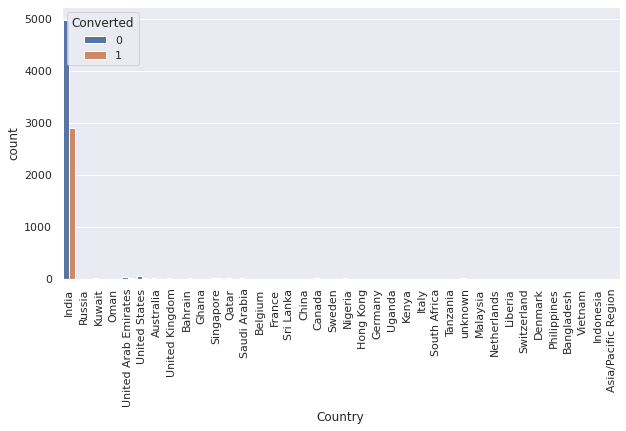

In [77]:
fig = plt.subplots(figsize = (10,5))
sns.countplot(x = "Country", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

## <a id='5-1'>6.6 Analysis of variable: `Specialization`</a>

**Observation: Conversion Rate of leads with Specialization as 'Finance Management', 'Human Resource Management', 'Marketing Management' and 'Operation Management' is high and they have significant number of leads as well.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

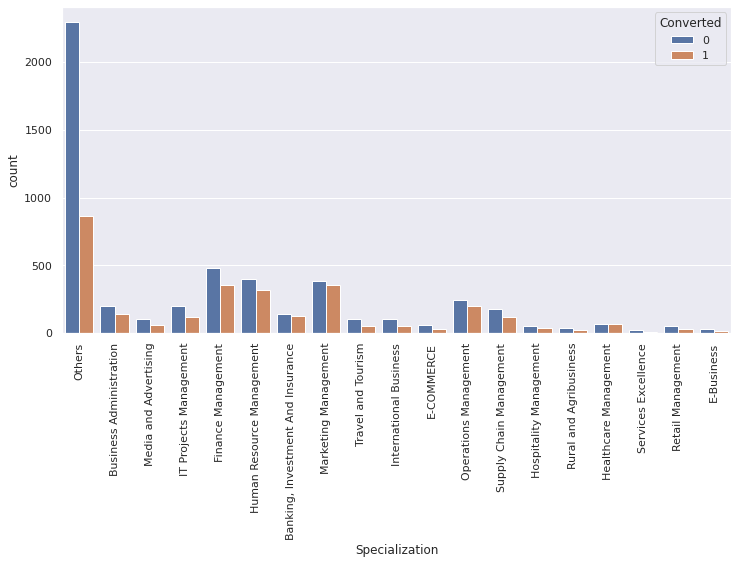

In [78]:
fig, axs = plt.subplots(figsize = (12,6))
sns.countplot(x = "Specialization", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

## <a id='5-1'>6.7 Analysis of variable: `How did you hear about X Education`</a>

**Observation: Conversion Rate of leads where leads have selected 'Online Search', 'Student of Some School', 'Word of Mouth' and 'Social Media'is more than 50% of the respective generated leads.**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

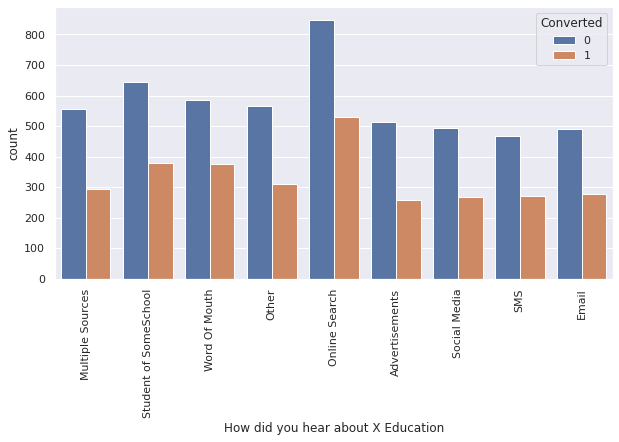

In [79]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = 'How did you hear about X Education', hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

## <a id='5-1'>6.8 Analysis of variable: `What is your current occupation`</a>

**Observation:**
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.
- Most of the leads have Occupation as 'Unemployed' and there is not much variance in this variable to have an impact on conversion rate. So, we will drop this variable.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

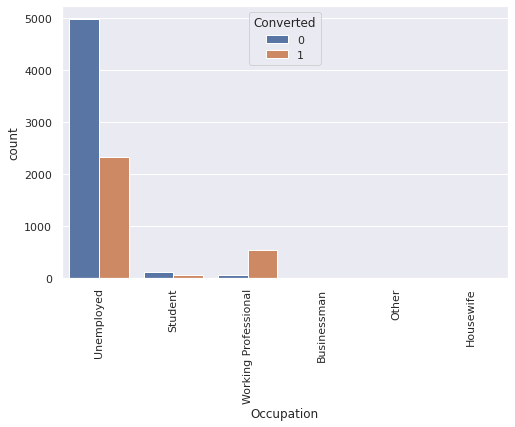

In [80]:
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Occupation", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

## <a id='5-1'>6.9 Analysis of variable: `Tags`</a>

**Observations:**
- Most of the leads have tags: 'Interested in other courses', 'Ringing' and 'Already a student'.
- Conversion Rate of leads with tags as 'Will revert after reading the email' is very high and tags as 'Lost EINS', 'Closed by Horizzon' is also high.

**To improve overall lead conversion rate, focus should be on improving lead conversion of `Interested in other courses`, `Ringing` and `Already a student` leads.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

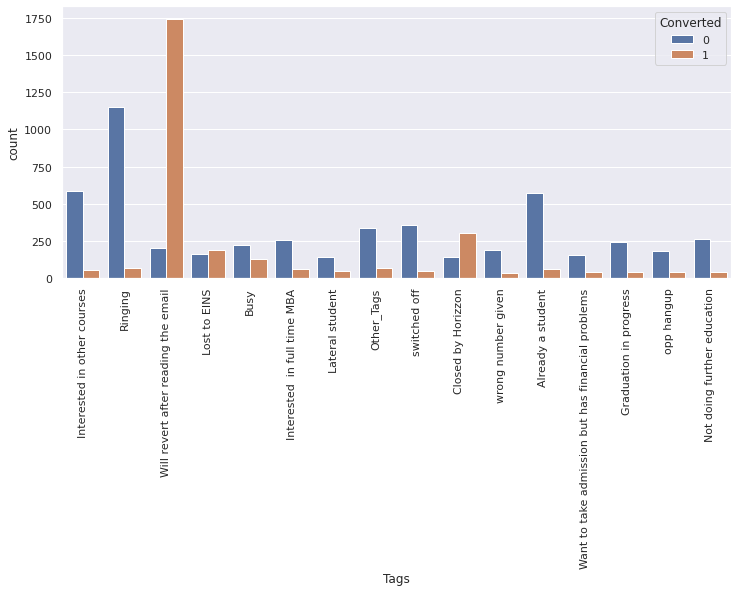

In [81]:
fig, axs = plt.subplots(figsize = (12,5))
sns.countplot(x = "Tags", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

## <a id='5-1'>6.10 Analysis of variable: `Lead Quality`</a>

**Observation:** In the below graph we can see that who has seriously explore the offering by the company and might have some queries before get converted has most of the Lead Conversion rate followed by the "High in Relevance" based on the customer experience and prefrences.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

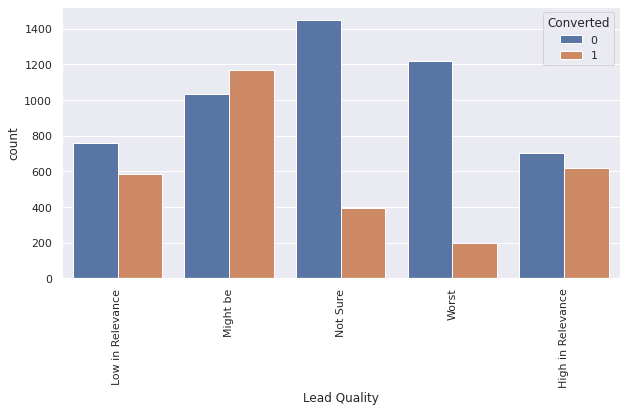

In [82]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

## <a id='5-1'>6.11 Analysis of variable: `Lead Profile`</a>

**Observation:** It was clearly seen in the below graph that the customers who are identified as Potential Leads are getting successfully converted to sales, however the 'Dual Specialization Student' has the least conversion rate.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

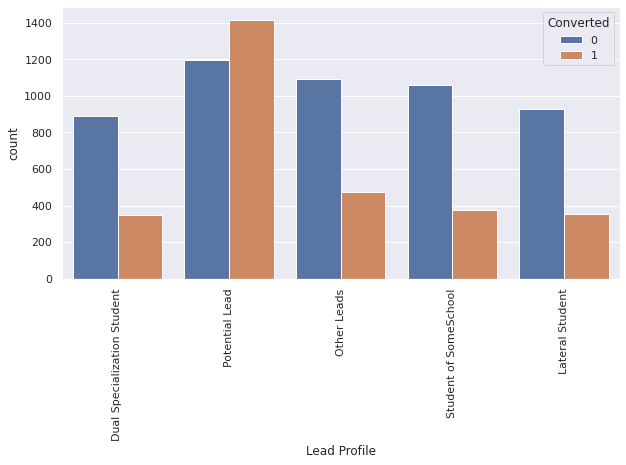

In [83]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Profile", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

## <a id='5-1'>6.12 Analysis of variable: `City`</a>

**Observation: Most leads are from mumbai with around 30% conversion rate. However, it's doesn't matter from which city the lead comes from as company should focus on all the leads irrespective of their City. So, we will drop this variable.**

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

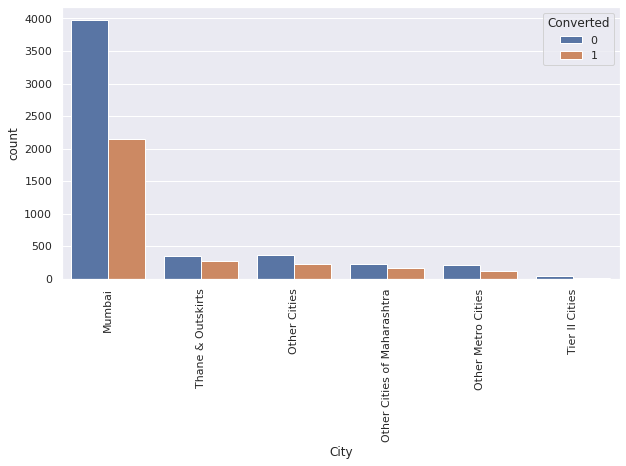

In [84]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

## <a id='5-1'>6.13 Analysis of variable: `A free copy of Mastering The Interview`</a>

**Observation: Most entries are 'No' and no significant inference can be made**

In [85]:
leads_revised_df['A free copy of Mastering The Interview'].value_counts()

No     5729
Yes    2404
Name: A free copy of Mastering The Interview, dtype: int64

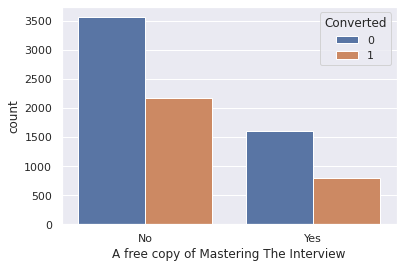

In [86]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_revised_df)

## <a id='5-1'>6.14 Analysis of variable: `Last Notable Activity`</a>

**Observations:**
- We can see that there are various activities which have very few leads, hence for better analysis we will combine all these sources to one category: 'Others'.

- Most of the leads have 'Email Opened' and 'Modified' as their last notable activity.
- Conversion Rate of leads with last activity as 'SMS Sent' is high.

**To improve overall lead conversion rate, focus should be on improving lead conversion of `Modified`, and `Email Opened` leads.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

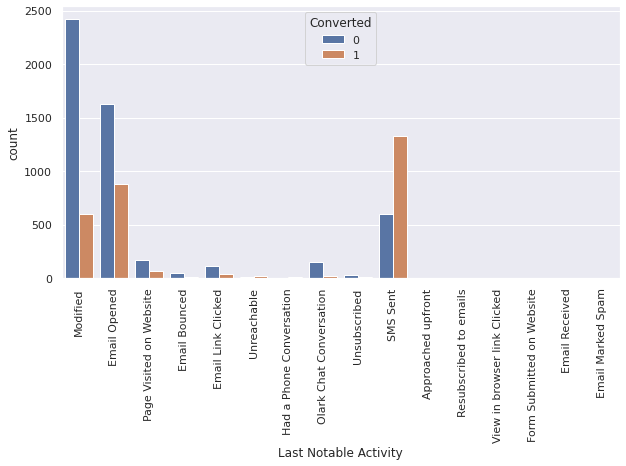

In [87]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

In [88]:
# Let's keep considerable last activities as such and club all others to "Others"
leads_revised_df['Last Notable Activity'] = leads_revised_df['Last Notable Activity'].replace(['Email Bounced',
                                                                               'Unsubscribed', 'Unreachable',
                                                                               'Had a Phone Conversation',
                                                                               'Email Marked Spam',
                                                                               'Approached upfront',
                                                                               'Resubscribed to emails',
                                                                               'Email Received',
                                                                               'Form Submitted on Website',
                                                                               'View in browser link Clicked'],
                                                                               'Others')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

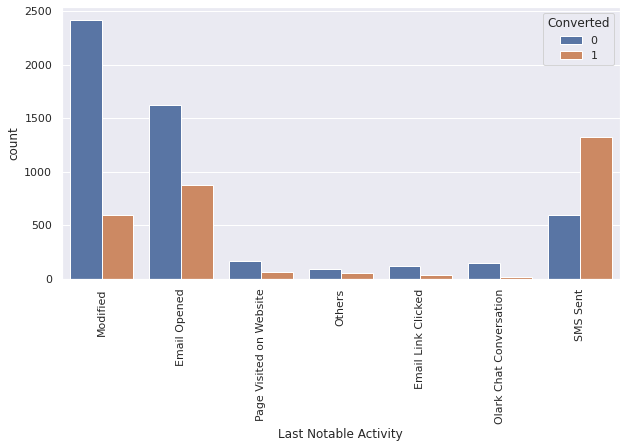

In [89]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_revised_df)
plt.xticks(rotation = 90)

## <a id='5-1'>6.15 Analysis of variable: `Time Spent Above 1hr`</a>

**Observation:**
- There are significant number of leads which are spending more than 1 hr on the website and almost 60% is the conversion rate.

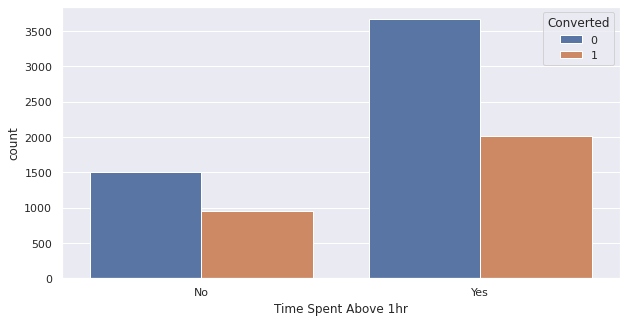

In [90]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Time Spent Above 1hr", hue = "Converted", data = leads_revised_df)

**Based on the above analysis we have seen that some columns are not adding any information to the model, hence we can drop them from further analysis**

In [91]:
leads_revised_df = leads_revised_df.drop(['Occupation', 'City', 'Country'],axis = 1)
leads_revised_df.shape

(8133, 16)

## <a id='5-1'>6.15 Heat Map Analysis`</a>

**Observation: `Total Visits` and `Page Views Per Visit` are significantly correlated, hence we will drop one of these.**

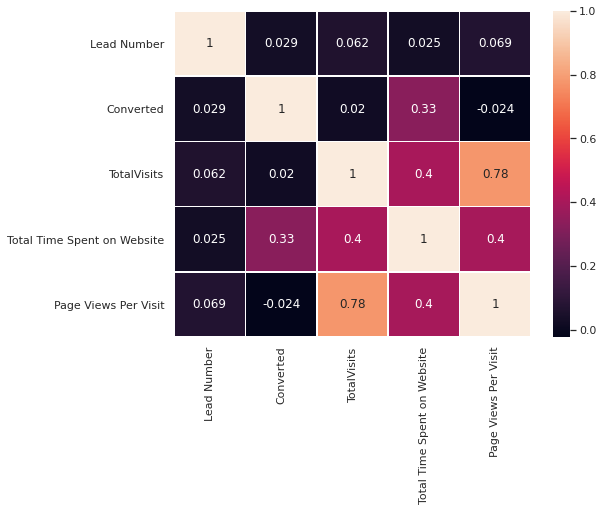

In [92]:
plt.figure(figsize = (8, 6))
corr_df = leads_revised_df.corr()
sns.heatmap(corr_df, xticklabels = corr_df.columns.values, yticklabels = corr_df.columns.values, linewidths = .5,
            annot = True)
plt.show()

In [93]:
# Dropping 'Page Views Per Visit'
leads_revised_df = leads_revised_df.drop("Page Views Per Visit", axis = 1)

In [94]:
leads_revised_df.shape

(8133, 15)

In [95]:
leads_revised_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,How did you hear about X Education,Tags,Lead Quality,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity,Time Spent Above 1hr
0,660737,API,Olark Chat,0,0.0000,0,Page Visited on Website,Others,Multiple Sources,Interested in other courses,Low in Relevance,Dual Specialization Student,No,Modified,No
1,660728,API,Organic Search,0,5.0000,11,Email Opened,Others,Multiple Sources,Ringing,Might be,Dual Specialization Student,No,Email Opened,Yes
2,660727,Landing Page Submission,Direct Traffic,1,2.0000,26,Email Opened,Business Administration,Student of SomeSchool,Will revert after reading the email,Might be,Potential Lead,Yes,Email Opened,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0000,5,Others,Media and Advertising,Word Of Mouth,Ringing,Not Sure,Other Leads,No,Modified,Yes
4,660681,Landing Page Submission,Google,1,2.0000,24,Converted to Lead,Others,Other,Will revert after reading the email,Might be,Potential Lead,No,Modified,Yes


In [96]:
numeric_columns = leads_revised_df.select_dtypes(include = [np.number])
categorical_columns = leads_revised_df.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical variables in the data set'.\
     format(numeric_columns.shape[1], categorical_columns.shape[1]))

There are 4 numerical and 11 categorical variables in the data set


In [97]:
leads_revised_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'Tags', 'Lead Quality',
       'Lead Profile', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'Time Spent Above 1hr'],
      dtype='object')

# <a id='5'>Step 7: Data Preparation</a>

Converting the binary variables (Yes/No) to 1/0

In [98]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview', 'Time Spent Above 1hr']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [99]:
# Applying the function
leads_revised_df[varlist] = leads_revised_df[varlist].apply(binary_map)

## <a id='5-2'>7.1 Identifying the Unique values of Categorical variables</a>

In [100]:
numeric_columns = leads_revised_df.select_dtypes(include = [np.number])
categorical_columns = leads_revised_df.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical variables in the data set'.\
     format(numeric_columns.shape[1], categorical_columns.shape[1]))

There are 6 numerical and 9 categorical variables in the data set


In [101]:
categorical_columns.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'Tags', 'Lead Quality',
       'Lead Profile', 'Last Notable Activity'],
      dtype='object')

In [102]:
print('1. Unique values in column: "Lead Origin" are:', leads_revised_df['Lead Origin'].unique())
print('2. Unique values in column: "Lead Source" are:', "\n", leads_revised_df['Lead Source'].unique())
print('3. Unique values in column: "Last Activity" are:', "\n", leads_revised_df['Last Activity'].unique())
print('4. Unique values in column: "Specialization" are:', "\n", leads_revised_df['Specialization'].unique())
print('5. Unique values in column: "How did you hear about X Education" are:', "\n",
      leads_revised_df['How did you hear about X Education'].unique())
print('6. Unique values in column: "Tags" are:', "\n", leads_revised_df['Tags'].unique())
print('7. Unique values in column: "Lead Quality" are:', "\n", leads_revised_df['Lead Quality'].unique())
print('8. Unique values in column: "Lead Profile" are:', "\n", leads_revised_df['Lead Profile'].unique())
print('9. Unique values in column: "Last Notable Activity" are:', "\n",
      leads_revised_df['Last Notable Activity'].unique())

1. Unique values in column: "Lead Origin" are: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
2. Unique values in column: "Lead Source" are: 
 ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'Welingak Website' 'Facebook' 'Miscellaneous']
3. Unique values in column: "Last Activity" are: 
 ['Page Visited on Website' 'Email Opened' 'Others' 'Converted to Lead'
 'Olark Chat Conversation' 'Email Bounced' 'Email Link Clicked'
 'Form Submitted on Website' 'SMS Sent']
4. Unique values in column: "Specialization" are: 
 ['Others' 'Business Administration' 'Media and Advertising'
 'IT Projects Management' 'Finance Management' 'Human Resource Management'
 'Banking, Investment And Insurance' 'Marketing Management'
 'Travel and Tourism' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Supply Chain Management'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'Services Excellence' 'Retail Management' 'E-

## <a id='5-2'>7.2 Dummy Variable Creation</a>

In [103]:
varlist = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
           'How did you hear about X Education', 'Tags', 'Lead Quality',
           'Lead Profile', 'Last Notable Activity']
dummy_df = pd.get_dummies(leads_revised_df[varlist], drop_first = True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


**Variables and the Coding**

- Lead Origin
    - `000`  == `API`
    - `100`  == `Landing Page Submission`
    - `010`  == `Lead Add Form`
    - `001`  == `Lead Import`
    
- Lead Source
    - `00000000` == `Direct Traffic` 
    - `10000000` == `Facebook`
    - `01000000` == `Google`
    - `00100000` == `Miscellaneous`
    - `00010000` == `Olark Chat`
    - `00001000` == `Organic Search`
    - `00000100` == `Reference`
    - `00000010` == `Referral Site`
    - `00000001` == `Welingak Website`
    
- Last Activity
    - `00000000` == `Converted to Lead` 
    - `10000000` == `Email Bounced`
    - `01000000` == `Email Link Clicked`
    - `00100000` == `Email Opened`
    - `00010000` == `Form Submitted on Website`
    - `00001000` == `Olark Chat Conversation`
    - `00000100` == `Others`
    - `00000010` == `Page Visited on Website`
    - `00000001` == `SMS Sent`
    
- Specialization
    - `000000000000000000` == `Banking, Investment And Insurance` 
    - `100000000000000000` == `Business Administration`
    - `010000000000000000` == `E-Business`
    - `001000000000000000` == `E-COMMERCE`
    - `000100000000000000` == `Finance Management`
    - `000010000000000000` == `Healthcare Management`
    - `000001000000000000` == `Hospitality Management`
    - `000000100000000000` == `Human Resource Management`
    - `000000010000000000` == `IT Projects Management`
    - `000000001000000000` == `International Business`
    - `000000000100000000` == `Marketing Management`
    - `000000000010000000` == `Media and Advertising`
    - `000000000001000000` == `Operations Management 	`
    - `000000000000100000` == `Others`
    - `000000000000010000` == `Retail Management`
    - `000000000000001000` == `Rural and Agribusiness`
    - `000000000000000100` == `Services Excellence`
    - `000000000000000010` == `Supply Chain Management`
    - `000000000000000001` == `Travel and Tourism`
    
- How did you hear about X Education
    - `00000000` == `Advertisements` 
    - `10000000` == `Email`
    - `01000000` == `Multiple Sources`
    - `00100000` == `Online Search`
    - `00010000` == `Other`
    - `00001000` == `SMS`
    - `00000100` == `Social Media`
    - `00000010` == `Student of SomeSchool`
    - `00000001` == `Word Of Mouth`
    
- Tags
    - `000000000000000` == `Already a student` 
    - `100000000000000` == `Busy`
    - `010000000000000` == `Closed by Horizzon`
    - `001000000000000` == `Graduation in progress`
    - `000100000000000` == `Interested in full time MBA`
    - `000010000000000` == `Interested in other courses`
    - `000001000000000` == `Lateral student`
    - `000000100000000` == `Lost to EINS`
    - `000000010000000` == `Not doing further education`
    - `000000001000000` == `Other_Tags`
    - `000000000100000` == `Ringing`
    - `000000000010000` == `Want to take admission but has financial problems`
    - `000000000001000` == `Will revert after reading the email`
    - `000000000000100` == `opp hangup`
    - `000000000000010` == `switched off`
    - `000000000000001` == `wrong number given`
    
- Lead Quality
    - `0000`  == `High in Relevance`
    - `1000`  == `Low in Relevance`
    - `0100`  == `Might be`
    - `0010`  == `Not Sure`
    - `0001`  == `Worst`

- Lead Profile
    - `0000`  == `Dual Specialization Student`
    - `1000`  == `Lateral Student`
    - `0100`  == `Other Leads`
    - `0010`  == `Potential Lead`
    - `0001`  == `Student of SomeSchool`

- Last Notable Activity
    - `000000`  == `Email Link Clicked`
    - `100000`  == `Email Opened`
    - `010000`  == `Modified`
    - `001000`  == `Olark Chat Conversation`
    - `000100`  == `Others`
    - `000010`  == `Page Visited on Website`
    - `000001`  == `SMS Sent`

**Adding the Dummy variables to the dataframe**

In [104]:
leads_revised_df = pd.concat([leads_revised_df,dummy_df], axis = 1)
leads_revised_df.head(2)

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,How did you hear about X Education,Tags,Lead Quality,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity,Time Spent Above 1hr,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0.0000,0,Page Visited on Website,Others,Multiple Sources,Interested in other courses,Low in Relevance,Dual Specialization Student,0,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,660728,API,Organic Search,0,5.0000,11,Email Opened,Others,Multiple Sources,Ringing,Might be,Dual Specialization Student,0,Email Opened,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [105]:
print(leads_revised_df.shape)

(8133, 89)


**Lets drop the Categorical Columns as these are not required any more**

In [106]:
leads_regression = leads_revised_df.copy()

In [107]:
leads_regression.drop(columns = varlist, inplace=True)
leads_regression.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Time Spent Above 1hr,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0000,11,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,660727,1,2.0000,26,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
3,660719,0,1.0000,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,660681,1,2.0000,24,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [108]:
numeric_columns = leads_regression.select_dtypes(include = [np.number])
categorical_columns = leads_regression.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical variables in the data set'.\
     format(numeric_columns.shape[1], categorical_columns.shape[1]))

There are 80 numerical and 0 categorical variables in the data set


# <a id='3'>Step 8: Splitting the Data into Training and Testing Sets</a>

In [109]:
# Creating target variable: "Converted" as 'y' and remaining as 'X'
X = leads_regression.drop(['Lead Number','Converted'], axis=1)
y = leads_regression['Converted']
display(y.head(),X.head())

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Time Spent Above 1hr,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5.0000,11,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,2.0000,26,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
3,1.0000,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,2.0000,24,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


**Here we will split the dataset into two sets: Train and Test in 70:30 ratio**

In [110]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**Let's check the shape of Training and Test set**

In [111]:
print("Shape of 'X' Training Set:","\n - No. of Rows:",X_train.shape[0],
      "\n - No. of Columns:",X_train.shape[1])
print("\nShape of 'X' Test Set:","\n - No. of Rows:",X_test.shape[0],
      "\n - No. of Columns:",X_test.shape[1])
print("\nShape of 'y' Training Set:","\n - No. of Rows:",y_train.shape)
print("\nShape of 'y' Test Set:","\n - No. of Rows:",y_test.shape)

Shape of 'X' Training Set: 
 - No. of Rows: 5693 
 - No. of Columns: 78

Shape of 'X' Test Set: 
 - No. of Rows: 2440 
 - No. of Columns: 78

Shape of 'y' Training Set: 
 - No. of Rows: (5693,)

Shape of 'y' Test Set: 
 - No. of Rows: (2440,)


### Rescaling the Features
- Rescaling of the selected Numerical Columns by Stander Scaler

**1. Train dataset - Fit and Transform**

In [112]:
cols_to_rescale = ['TotalVisits', 'Total Time Spent on Website']
X_train[cols_to_rescale].head(2)

,TotalVisits,Total Time Spent on Website
891,4.0000,8
2983,3.0000,0


In [113]:
scaling = StandardScaler()
X_train[cols_to_rescale] = scaling.fit_transform(X_train[cols_to_rescale])
X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Time Spent Above 1hr,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
891,0.5462,0.1453,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2983,0.1254,-0.8537,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3181,1.3879,-0.3542,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1447,-0.2955,1.1444,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1973,-0.2955,1.0195,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [114]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Time Spent Above 1hr,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000,5693.0000
mean,-0.0000,0.0000,0.2928,0.6933,0.5062,0.0727,0.0033,0.0035,0.3169,0.0026,0.2213,0.1061,0.0515,0.0119,0.0167,0.0365,0.0325,0.3764,0.0130,0.1115,0.0202,0.0606,0.2986,0.0446,0.0063,0.0105,0.1040,0.0160,0.0116,0.0882,0.0393,0.0165,0.0901,0.0188,0.0529,0.3907,0.0104,0.0070,0.0044,0.0362,0.0188,0.0919,0.1066,0.1693,0.1054,0.0917,0.0942,0.1295,0.1193,0.0432,0.0546,0.0374,0.0376,0.0789,0.0242,0.0418,0.0355,0.0499,0.1460,0.0248,0.2412,0.0283,0.0481,0.0292,0.1656,0.2749,0.2252,0.1765,0.1563,0.1948,0.3199,0.1764,0.3051,0.3724,0.0202,0.0181,0.0281,0.2352
std,1.0001,1.0001,0.4551,0.4612,0.5000,0.2597,0.0577,0.0592,0.4653,0.0513,0.4152,0.3080,0.2210,0.1086,0.1281,0.1876,0.1773,0.4845,0.1133,0.3148,0.1407,0.2386,0.4577,0.2065,0.0793,0.1021,0.3053,0.1254,0.1071,0.2836,0.19

# <a id='3'>Step 9: Building the Logistics Regression Model</a>

## <a id='5-2'>9.1 Running our First Training Model</a>

In [115]:
# Running the logistics model
log_reg1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = log_reg1.fit()

#Summary of Model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5693
Model:                            GLM   Df Residuals:                     5614
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.4
Date:                Sun, 15 Nov 2020   Deviance:                       2894.7
Time:                        18:50:12   Pearson chi2:                 7.97e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -1.8344      0.825     -2.225      0.026      -3.451      -0.218
TotalVisits                                                  0.2025      0.071      2.841      0.004       0.063       0.342
Total Time Spent on Website                                  1.0471      0.059     17.717      0.000       0.931       1.163
A free copy of Mastering The Interview                      -0.0863      0.161     -0.535      0.592      -0.402       0.230
Time Spent Above 1hr                                        -0.6949      0.246     -2.826      0.005      -1.177      -0.213
Lead Origin_Landing Page Submission                         -0.8381      0.208     -4.023      0.000      -1.246      -0.430
Lead Origin_Lead Add Form                                    1.8252      0.817      2.234      0.025       0.224       3.426
Lead Origin_Lead Import                                     22.3635   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Facebook                                       -21.1318   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Google                                           0.0704      0.168      0.418      0.676      -0.260       0.400
Lead Source_Miscellaneous                                    0.6014      0.979      0.614      0.539      -1.318       2.521
Lead Source_Olark Chat                                       0.7803      0.289      2.699      0.007       0.214       1.347
Lead Source_Organic Search                                  -0.0571      0.197     -0.290      0.772      -0.443       0.328
Lead Source_Reference                                        0.4564      0.850      0.537      0.591      -1.210       2.123
Lead Source_Referral Sites                                   0.0890      0.519      0.171      0.864      -0.929       1.107
Lead Source_Welingak Website                                 4.0433      1.105      3.659      0.000       1.878       6.209
Last Activity_Email Bounced                                 -1.3640      0.487     -2.803      0.005      -2.318      -0.410
Last Activity_Email Link Clicked                             0.1827      0.530      0.345      0.730      -0.856       1.222
Last Activity_Email Opened                                   0.4620      0.308      1.499      0.134      -0.142       1.066
Last Activity_Form Submitted on Website                     -0.4005      0.519     -0.771      0.441      -1.419       0.618
Last Activity_Olark Chat Conversation                       -1.2119      0.344     -3.522      0.000      -1.886      -0.537
Last Activity_Others                                         0.3299      0.509     

## <a id='5-2'>9.2 Model Building using RFE</a>

#### As there are lot of variables we will use RFE to shortlist the variables

Below criteria will be followed for dropping the variables:

1. Variable with High `P-value` and High `VIF` will be dropped first.
2. Variable with High `P-value` and Low `VIF` will be dropped Second.
3. Variable with Low `P-value` and High `VIF` will be dropped last.

Decision Making Factor for Dropping the Variable
1. P-value above 0.05
2. VIF above 5

We will also take Business Judgement before dropping any variable

### <a id='5-2'>Model - 1</a>

In [116]:
# Running RFE with 20 variables as output
logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [117]:
print("Selected Features: %s" % rfe.support_)

Selected Features: [False  True False  True  True  True False False False False False False
 False False  True  True False False False  True False False  True False
 False False False False False False False False False False False  True
 False  True False False  True False False False False False False False
 False  True  True False False False False  True False False  True False
  True False  True False False False False False False False  True False
 False  True False False False  True]


In [118]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 28),
 ('Time Spent Above 1hr', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Source_Facebook', False, 56),
 ('Lead Source_Google', False, 55),
 ('Lead Source_Miscellaneous', False, 14),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Reference', False, 49),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 47),
 ('Last Activity_Email Opened', False, 11),
 ('Last Activity_Form Submitted on Website', False, 2),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 12),
 ('Last Activity_Page Visited on Website', False, 53),
 ('Last Activity_SMS Sent', True, 1),


In [119]:
col = X_train.columns[rfe.support_]

#### Building model using `statsmodel` for the detailed statistics

In [120]:
# Creating a dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the logistics model
log_reg2 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
res = log_reg2.fit()

#Summary of Model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5693
Model:                            GLM   Df Residuals:                     5672
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1483.7
Date:                Sun, 15 Nov 2020   Deviance:                       2967.3
Time:                        18:50:19   Pearson chi2:                 7.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.6076      0.210     -2.887      0.004      -1.020      -0.195
Total Time Spent on Website                  1.0544      0.057     18.376      0.000       0.942       1.167
Time Spent Above 1hr                        -1.0608      0.157     -6.757      0.000      -1.368      -0.753
Lead Origin_Landing Page Submission         -1.0851      0.180     -6.015      0.000      -1.439      -0.731
Lead Origin_Lead Add Form                    1.5120      0.301      5.022      0.000       0.922       2.102
Lead Source_Welingak Website                 3.6269      0.810      4.475      0.000       2.038       5.215
Last Activity_Email Bounced                 -1.3812      0.369     -3.742      0.000      -2.105      -0.658
Last Activity_Olark Chat Conversation       -1.4291      0.208     -6.855      0.000      -1.838      -1.021
Last Activity_SMS Sent                       0.7463      0.201      3.705      0.000       0.352       1.141
Specialization_Others                       -0.8018      0.179     -4.468      0.000      -1.154      -0.450
Specialization_Rural and Agribusiness       -1.1351      0.693     -1.639      0.101      -2.493       0.222
Specialization_Travel and Tourism           -0.7311      0.365     -2.005      0.045      -1.446      -0.017
Tags_Busy                                    1.0605      0.189      5.622      0.000       0.691       1.430
Tags_Closed by Horizzon                      2.5134      0.178     14.093      0.000       2.164       2.863
Tags_Lost to EINS                            2.3920      0.178     13.410      0.000       2.042       2.742
Tags_Ringing                                -2.0596      0.195    -10.578      0.000      -2.441      -1.678
Tags_Will revert after reading the email     3.5581      0.135     26.377      0.000       3.294       3.822
Tags_switched off                           -1.3061      0.271     -4.823      0.000      -1.837      -0.775
Lead Profile_Potential Lead                  0.5171      0.104      4.979      0.000       0.314       0.721
Last Notable Activity_Modified              -0.6423      0.126     -5.081      0.000      -0.890      -0.395
Last Notable Activity_SMS Sent               1.5152      0.237      6.403      0.000       1.051       1.979
============================================================================================================
"""

**Observation:** In this Model all variables are significant except `Specialization_Rural and Agribusiness` as its P-value is greater than 0.05. Let's calculate the VIF.

In [121]:
#Calculating the VIFs for Model - 1
vif = pd.DataFrame()

vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Notable Activity_SMS Sent,6.3300
7,Last Activity_SMS Sent,6.1800
1,Time Spent Above 1hr,5.5600
2,Lead Origin_Landing Page Submission,4.4200
18,Last Notable Activity_Modified,2.5200
8,Specialization_Others,2.4700
15,Tags_Will revert after reading the email,1.9000
3,Lead Origin_Lead Add Form,1.8100
6,Last Activity_Olark Chat Conversation,1.5900
17,Lead Profile_Potential Lead,1.5800


**Observation:** Some of the variables have `VIF` value, greater than 5. However, we will use our second criteria i.e., `High P-value` and `Low VIF` to drop: `Specialization_Rural and Agribusiness` and re-evaluate the model again

In [122]:
col = col.drop(['Specialization_Rural and Agribusiness'])

### <a id='5-2'>Model - 2</a>

Re-evaluating the model after dropping variable:`Specialization_Rural and Agribusiness`

In [123]:
# Creating a dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the logistics model
log_reg2 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
res = log_reg2.fit()

#Summary of Model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5693
Model:                            GLM   Df Residuals:                     5673
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1485.1
Date:                Sun, 15 Nov 2020   Deviance:                       2970.1
Time:                        18:50:19   Pearson chi2:                 7.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.6338      0.210     -3.014      0.003      -1.046      -0.222
Total Time Spent on Website                  1.0503      0.057     18.351      0.000       0.938       1.162
Time Spent Above 1hr                        -1.0480      0.157     -6.687      0.000      -1.355      -0.741
Lead Origin_Landing Page Submission         -1.0832      0.181     -5.995      0.000      -1.437      -0.729
Lead Origin_Lead Add Form                    1.5190      0.301      5.045      0.000       0.929       2.109
Lead Source_Welingak Website                 3.6222      0.810      4.471      0.000       2.034       5.210
Last Activity_Email Bounced                 -1.3781      0.368     -3.740      0.000      -2.100      -0.656
Last Activity_Olark Chat Conversation       -1.4235      0.208     -6.833      0.000      -1.832      -1.015
Last Activity_SMS Sent                       0.7507      0.201      3.729      0.000       0.356       1.145
Specialization_Others                       -0.7880      0.180     -4.389      0.000      -1.140      -0.436
Specialization_Travel and Tourism           -0.7215      0.364     -1.981      0.048      -1.435      -0.008
Tags_Busy                                    1.0662      0.189      5.654      0.000       0.697       1.436
Tags_Closed by Horizzon                      2.5108      0.178     14.116      0.000       2.162       2.859
Tags_Lost to EINS                            2.3991      0.178     13.460      0.000       2.050       2.748
Tags_Ringing                                -2.0551      0.195    -10.560      0.000      -2.436      -1.674
Tags_Will revert after reading the email     3.5575      0.135     26.378      0.000       3.293       3.822
Tags_switched off                           -1.3025      0.271     -4.814      0.000      -1.833      -0.772
Lead Profile_Potential Lead                  0.5162      0.104      4.975      0.000       0.313       0.719
Last Notable Activity_Modified              -0.6372      0.126     -5.047      0.000      -0.885      -0.390
Last Notable Activity_SMS Sent               1.5178      0.237      6.417      0.000       1.054       1.981
============================================================================================================
"""

**Observation:** In this Model all variables are significant as there P-values are below 0.05. Let's calculate the VIF.

In [124]:
#Calculating the VIFs for Model - 2
vif = pd.DataFrame()

vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Last Notable Activity_SMS Sent,6.3300
7,Last Activity_SMS Sent,6.1800
1,Time Spent Above 1hr,5.5600
2,Lead Origin_Landing Page Submission,4.4100
17,Last Notable Activity_Modified,2.5200
8,Specialization_Others,2.4700
14,Tags_Will revert after reading the email,1.9000
3,Lead Origin_Lead Add Form,1.8100
6,Last Activity_Olark Chat Conversation,1.5900
16,Lead Profile_Potential Lead,1.5800


**Observation:** Some of the variables have high `VIF`, greater than 5. Let's drop variable: `Last Notable Activity_SMS Sent` with highest VIF value and re-evaluate the model.

In [125]:
col = col.drop(['Last Notable Activity_SMS Sent'])

### <a id='5-2'>Model - 3</a>

Re-evaluating the model after dropping variable:`Last Notable Activity_SMS Sent`.

In [126]:
# Creating a dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the logistics model
log_reg2 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
res = log_reg2.fit()

#Summary of Model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5693
Model:                            GLM   Df Residuals:                     5674
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1506.4
Date:                Sun, 15 Nov 2020   Deviance:                       3012.7
Time:                        18:50:20   Pearson chi2:                 7.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4820      0.209     -2.311      0.021      -0.891      -0.073
Total Time Spent on Website                  1.0576      0.057     18.618      0.000       0.946       1.169
Time Spent Above 1hr                        -1.0637      0.155     -6.857      0.000      -1.368      -0.760
Lead Origin_Landing Page Submission         -1.0899      0.181     -6.015      0.000      -1.445      -0.735
Lead Origin_Lead Add Form                    1.5611      0.302      5.173      0.000       0.970       2.153
Lead Source_Welingak Website                 3.3602      0.790      4.254      0.000       1.812       4.908
Last Activity_Email Bounced                 -1.2070      0.370     -3.261      0.001      -1.932      -0.482
Last Activity_Olark Chat Conversation       -1.2450      0.207     -6.007      0.000      -1.651      -0.839
Last Activity_SMS Sent                       1.8284      0.112     16.393      0.000       1.610       2.047
Specialization_Others                       -0.7854      0.180     -4.358      0.000      -1.139      -0.432
Specialization_Travel and Tourism           -0.7713      0.360     -2.141      0.032      -1.477      -0.065
Tags_Busy                                    1.0753      0.185      5.824      0.000       0.713       1.437
Tags_Closed by Horizzon                      2.5140      0.179     14.041      0.000       2.163       2.865
Tags_Lost to EINS                            2.3533      0.180     13.100      0.000       2.001       2.705
Tags_Ringing                                -1.8911      0.188    -10.045      0.000      -2.260      -1.522
Tags_Will revert after reading the email     3.5624      0.135     26.433      0.000       3.298       3.827
Tags_switched off                           -1.1543      0.263     -4.395      0.000      -1.669      -0.640
Lead Profile_Potential Lead                  0.5098      0.103      4.939      0.000       0.307       0.712
Last Notable Activity_Modified              -1.0786      0.108     -9.972      0.000      -1.291      -0.867
============================================================================================================
"""

**Observation:** In this Model all variables are significant as there P-values are below 0.05. Let's calculate the VIF.

In [127]:
#Calculating the VIFs for Model - 3
vif = pd.DataFrame()

vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Time Spent Above 1hr,5.5500
2,Lead Origin_Landing Page Submission,4.4000
8,Specialization_Others,2.4400
17,Last Notable Activity_Modified,1.9500
14,Tags_Will revert after reading the email,1.8800
3,Lead Origin_Lead Add Form,1.8000
7,Last Activity_SMS Sent,1.6700
16,Lead Profile_Potential Lead,1.5800
0,Total Time Spent on Website,1.5500
6,Last Activity_Olark Chat Conversation,1.5300


**Observation:** Some of the variables have high `VIF`, greater than 5. Let's drop variable: `Time Spent Above 1hr` with highest VIF value and re-evaluate the model.

In [128]:
col = col.drop(['Time Spent Above 1hr'])

### <a id='5-2'>Model - 4</a>

Re-evaluating the model after dropping variable:`Time Spent Above 1hr`.

In [129]:
# Creating a dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the logistics model
log_reg2 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
res = log_reg2.fit()

#Summary of Model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5693
Model:                            GLM   Df Residuals:                     5675
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1530.2
Date:                Sun, 15 Nov 2020   Deviance:                       3060.4
Time:                        18:50:20   Pearson chi2:                 6.97e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1791      0.180     -6.554      0.000      -1.532      -0.827
Total Time Spent on Website                  0.8645      0.048     18.011      0.000       0.770       0.959
Lead Origin_Landing Page Submission         -1.3139      0.174     -7.543      0.000      -1.655      -0.973
Lead Origin_Lead Add Form                    2.0031      0.294      6.808      0.000       1.426       2.580
Lead Source_Welingak Website                 3.2651      0.788      4.141      0.000       1.720       4.810
Last Activity_Email Bounced                 -1.1616      0.365     -3.180      0.001      -1.877      -0.446
Last Activity_Olark Chat Conversation       -1.0427      0.206     -5.067      0.000      -1.446      -0.639
Last Activity_SMS Sent                       1.8330      0.111     16.538      0.000       1.616       2.050
Specialization_Others                       -0.6588      0.175     -3.771      0.000      -1.001      -0.316
Specialization_Travel and Tourism           -0.7948      0.354     -2.245      0.025      -1.489      -0.101
Tags_Busy                                    1.0236      0.182      5.618      0.000       0.666       1.381
Tags_Closed by Horizzon                      2.5339      0.177     14.295      0.000       2.186       2.881
Tags_Lost to EINS                            2.3841      0.178     13.390      0.000       2.035       2.733
Tags_Ringing                                -1.8735      0.186    -10.048      0.000      -2.239      -1.508
Tags_Will revert after reading the email     3.5677      0.133     26.757      0.000       3.306       3.829
Tags_switched off                           -1.2127      0.260     -4.656      0.000      -1.723      -0.702
Lead Profile_Potential Lead                  0.5105      0.102      4.984      0.000       0.310       0.711
Last Notable Activity_Modified              -1.1080      0.107    -10.344      0.000      -1.318      -0.898
============================================================================================================
"""

**Observation:** In this Model all variables are significant as there P-values are below 0.05. Let's calculate the VIF.

In [130]:
#Calculating the VIFs for Model - 4
vif = pd.DataFrame()

vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.2300
7,Specialization_Others,1.9700
16,Last Notable Activity_Modified,1.8800
13,Tags_Will revert after reading the email,1.8500
2,Lead Origin_Lead Add Form,1.8000
6,Last Activity_SMS Sent,1.6700
15,Lead Profile_Potential Lead,1.5600
5,Last Activity_Olark Chat Conversation,1.5100
3,Lead Source_Welingak Website,1.3800
12,Tags_Ringing,1.3700


**Observation:** In this Model, the VIF of all variables is below 5.

### In Final Model - 4:

- P-values of all the variables is below 0.05.
- VIF of all the variables is below 5.

**We can see that, the VIFs and P-values both are within an acceptable range. So now, we will go ahead and make the predictions using Model - 4.**

**Final Variables selected with RFE and Manual Elimination**

In [131]:
print("The final variables selected by the logistic regression model are ","\n",col)

The final variables selected by the logistic regression model are  
 Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'Specialization_Travel and Tourism', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Profile_Potential Lead', 'Last Notable Activity_Modified'],
      dtype='object')


# <a id='3'>Step 10: Analysis of the Train Data</a>

In [132]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_rfe)
y_train_pred[:10]

891    0.7686
2983   0.0017
3181   0.2756
1447   0.9880
1973   0.7955
4217   0.3224
4875   0.7824
3571   0.0044
4136   0.1394
8104   0.8831
dtype: float64

In [133]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.768582, 0.001750, 0.275631, 0.987962, 0.795533, 0.322351,
       0.782444, 0.004369, 0.139409, 0.883112])

**Creating a dataframe with the actual converted flag and the predicted probabilities**

In [134]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,1,0.7686,891
1,0,0.0017,2983
2,0,0.2756,3181
3,1,0.9880,1447
4,1,0.7955,1973


**Creating new column 'predicted' with 1 if "Converted_prob" > 0.5 else 0**

In [135]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
0,1,0.7686,891,1
1,0,0.0017,2983,0
2,0,0.2756,3181,0
3,1,0.9880,1447,1
4,1,0.7955,1973,1


In [136]:
# Let's Create the Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3369  246]
 [ 380 1698]]


#### Visualizing Confusion Matrix using Heatmap

In [137]:
def cnf_heatmap (cnf_matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

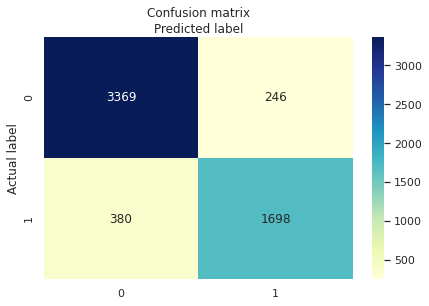

In [138]:
cnf_heatmap(confusion)

In [139]:
# Let's calculate the overall accuracy
print("Accuracy Score is:", accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy Score is: 0.8900404004918321


**We can observe that the Model Accuracy on train data with cutoff value as 0.50 is 89%.**

## Metrics beyond simply accuracy

### Based on the below Metrics Calculation when cut-off value is 0.5, we observe that:
- **Sensitivity of the model on train data is: `82%`**
- **Specificity of the model on train data is :`93%`**
- **False Positive Rate on train data is :`7%`**
- **True Positive Rate on train data is :`87%`**
- **True Negative Rate on train data is :`90%`**

In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

**Let's see the `Sensitivity` and `Specificity` on train data.**

In [141]:
print("Sensitivity of the model on train data is :", (TP / float(TP+FN)))
print("Specificity of the model on train data is :", (TN / float(TN+FP)))

Sensitivity of the model on train data is : 0.8171318575553417
Specificity of the model on train data is : 0.9319502074688797


**Let's see the False Positive, True Positive and True Negative rate of Test data**

In [142]:
print("False Positive rate of the model on train data is :",(FP / float(TN+FP)))
print("True Positive rate of the model on train data is :",(TP / float(TP+FP)))
print("True Negative rate of the model on train data is :",(TN / float(TN+FN)))

False Positive rate of the model on train data is : 0.06804979253112033
True Positive rate of the model on train data is : 0.8734567901234568
True Negative rate of the model on train data is : 0.8986396372365965


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [144]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Converted_prob,
                                         drop_intermediate = False )

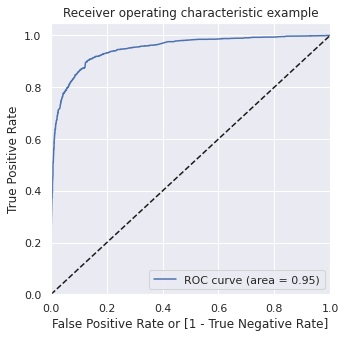

In [145]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

**Optimal cutoff probability is the probability where we get balanced sensitivity and specificity**

In [146]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.7686,891,1,1,1,1,1,1,1,1,1,0,0
1,0,0.0017,2983,0,1,0,0,0,0,0,0,0,0,0
2,0,0.2756,3181,0,1,1,1,0,0,0,0,0,0,0
3,1,0.9880,1447,1,1,1,1,1,1,1,1,1,1,1
4,1,0.7955,1973,1,1,1,1,1,1,1,1,1,0,0


In [147]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0000,0.0000,0.3650,1.0000,0.0000
0.1000,0.1000,0.7845,0.9557,0.6860
0.2000,0.2000,0.8589,0.9230,0.8221
0.3000,0.3000,0.8816,0.9013,0.8703
0.4000,0.4000,0.8867,0.8523,0.9065
0.5000,0.5000,0.8900,0.8171,0.9320
0.6000,0.6000,0.8895,0.7820,0.9513
0.7000,0.7000,0.8835,0.7421,0.9649
0.8000,0.8000,0.8679,0.6718,0.9806
0.9000,0.9000,0.8270,0.5419,0.9909


<Figure size 864x576 with 0 Axes>

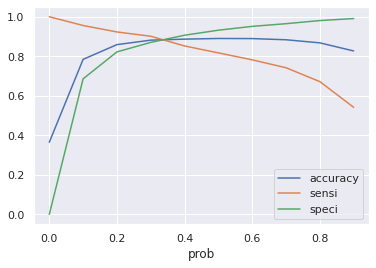

In [148]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
plt.figure(figsize = (12,8))
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.32 is the optimum point to take it as a cutoff probability.

In [149]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.7686,891,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.0017,2983,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.2756,3181,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.9880,1447,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.7955,1973,1,1,1,1,1,1,1,1,1,0,0,1


In [150]:
# Let's check the overall accuracy.
print("Model Accuracy on Train data is ", round(accuracy_score(y_train_pred_final.Converted,
                                                                       y_train_pred_final.final_predicted),4))

Model Accuracy on Train data is  0.882


**We can observe that the Model Accuracy on train data with cutoff value as 0.32 is 88%.**

In [151]:
confusion1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion1

array([[3157,  458],
       [ 214, 1864]])

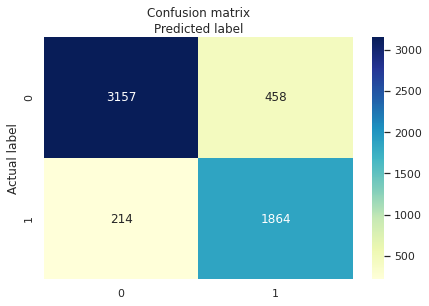

In [152]:
cnf_heatmap(confusion1)

### Based on the below Metrics Calculation when we use optimal cut-off value i.e., 0.32, we observe that:
- **Sensitivity of the model on train data is: `90%`**
- **Specificity of the model on train data is :`87%`**
- **False Positive Rate on train data is :`12%`**
- **True Positive Rate on train data is :`80%`**
- **True Negative Rate on train data is :`93%`**

In [153]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

**Let's see the `Sensitivity` and `Specificity` on train data.**

In [154]:
print("Sensitivity of the model on train data is :", (TP / float(TP+FN)))
print("Specificity of the model on train data is :", (TN / float(TN+FP)))

Sensitivity of the model on train data is : 0.8970163618864293
Specificity of the model on train data is : 0.8733056708160443


**Let's see the False Positive, True Positive and True Negative rate of Test data**

In [155]:
print("False Positive rate of the model on train data is :",(FP / float(TN+FP)))
print("True Positive rate of the model on train data is :",(TP / float(TP+FP)))
print("True Negative rate of the model on train data is :",(TN / float(TN+FN)))

False Positive rate of the model on train data is : 0.12669432918395573
True Positive rate of the model on train data is : 0.8027562446167097
True Negative rate of the model on train data is : 0.9365173539009196


## Precision and Recall

Let's evaluate the model using model evaluation metrics such as Accuracy, Precision and Recall.

In [156]:
#Looking at the confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

array([[3369,  246],
       [ 380, 1698]])

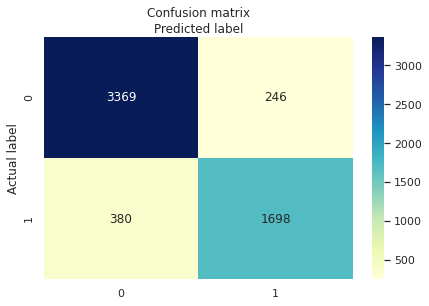

In [157]:
cnf_heatmap(confusion2)

##### Precision: TP / TP + FP

In [158]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8734567901234568

##### Recall: TP / TP + FN

In [159]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8171318575553417

In [160]:
print("Accuracy Score is:", accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("Precision Score is:", precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("Recall Score is:", recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy Score is: 0.8900404004918321
Precision Score is: 0.8734567901234568
Recall Score is: 0.8171318575553417


### Precision and recall tradeoff

In [161]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

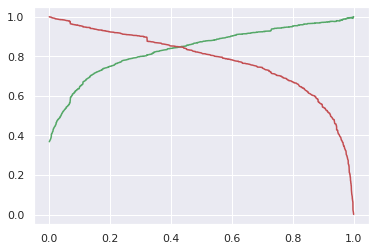

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# <a id='3'>Step 11: Making Predictions on the Test Set</a>

In [163]:
cols_to_rescale

['TotalVisits', 'Total Time Spent on Website']

In [164]:
X_test[cols_to_rescale] = scaling.transform(X_test[cols_to_rescale])

In [165]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Others,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Potential Lead,Last Notable Activity_Modified
3993,2.2684,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
6570,0.8946,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2199,0.8946,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1652,1.6439,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4991,1.2693,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [166]:
X_test_sm = sm.add_constant(X_test)

**Making predictions on the test set**

In [167]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3993   0.2245
6570   0.9754
2199   0.9754
1652   0.5235
4991   0.1921
2000   0.0036
3008   0.3633
2200   0.0180
5758   0.0683
7841   0.1261
dtype: float64

In [168]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
3993,0.2245
6570,0.9754
2199,0.9754
1652,0.5235
4991,0.1921


In [169]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [170]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [171]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [172]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,3993,0.2245
1,1,6570,0.9754
2,1,2199,0.9754
3,1,1652,0.5235
4,0,4991,0.1921


In [173]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [174]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_prob
0,3993,0,0.2245
1,6570,1,0.9754
2,2199,1,0.9754
3,1652,1,0.5235
4,4991,0,0.1921


In [175]:
# Creating new column "Lead Score" with 1 to100 using Converted Probability
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Lead Number,Converted,Converted_prob,Lead_Score
0,3993,0,0.2245,22
1,6570,1,0.9754,98
2,2199,1,0.9754,98
3,1652,1,0.5235,52
4,4991,0,0.1921,19


#### Taking 0.32 as the cutoff using sensitivity and specificity tradeoff

In [176]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.32 else 0)

In [177]:
y_pred_final.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted
0,3993,0,0.2245,22,0
1,6570,1,0.9754,98,1
2,2199,1,0.9754,98,1
3,1652,1,0.5235,52,1
4,4991,0,0.1921,19,0


#### Evaluation of model on test data

In [178]:
# Let's check the overall accuracy.
print("Model Accuracy on Test data is ", accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Model Accuracy on Test data is  0.8848360655737705


**We can observe that the Model Accuracy on test data with cutoff value as 0.32 is 88.5%.**

In [179]:
confusion3 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1368,  183],
       [  98,  791]])

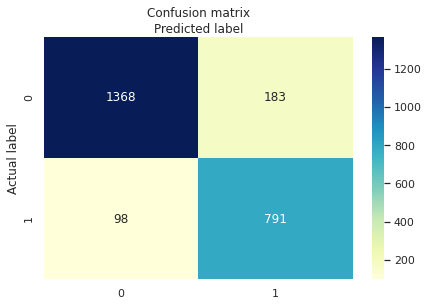

In [180]:
cnf_heatmap(confusion3)

### Based on the below Metrics Calculation when we use optimal cut-off value i.e., 0.32, we observe that:
- **Sensitivity of the model on test data is: `89%`**
- **Specificity of the model on test data is :`88%`**
- **False Positive Rate on test data is :`12%`**
- **True Positive Rate on test data is :`81%`**
- **True Negative Rate on test data is :`93%`**

In [181]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

**Let's see the `Sensitivity` and `Specificity` on test data.**

In [182]:
print("Sensitivity of the model on test data is :", (TP / float(TP+FN)))
print("Specificity of the model on test data is :", (TN / float(TN+FP)))

Sensitivity of the model on test data is : 0.889763779527559
Specificity of the model on test data is : 0.8820116054158608


**Let's see the False Positive, True Positive and True Negative rate of Test data**)

In [183]:
print("False Positive rate of the model on test data is :",(FP / float(TN+FP)))
print("True Positive rate of the model on test data is :",(TP / float(TP+FP)))
print("True Negative rate of the model on test data is :",(TN / float(TN+ FN)))

False Positive rate of the model on test data is : 0.11798839458413926
True Positive rate of the model on test data is : 0.8121149897330595
True Negative rate of the model on test data is : 0.9331514324693042


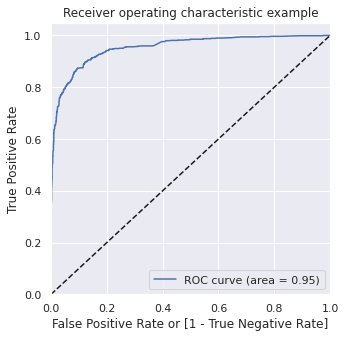

In [184]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_prob)

In [185]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
feature_importance = res.params[1:]
feature_importance

Total Time Spent on Website                 0.86
Lead Origin_Landing Page Submission        -1.31
Lead Origin_Lead Add Form                   2.00
Lead Source_Welingak Website                3.27
Last Activity_Email Bounced                -1.16
Last Activity_Olark Chat Conversation      -1.04
Last Activity_SMS Sent                      1.83
Specialization_Others                      -0.66
Specialization_Travel and Tourism          -0.79
Tags_Busy                                   1.02
Tags_Closed by Horizzon                     2.53
Tags_Lost to EINS                           2.38
Tags_Ringing                               -1.87
Tags_Will revert after reading the email    3.57
Tags_switched off                          -1.21
Lead Profile_Potential Lead                 0.51
Last Notable Activity_Modified             -1.11
dtype: float64

In [186]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                 24.23
Lead Origin_Landing Page Submission        -36.83
Lead Origin_Lead Add Form                   56.15
Lead Source_Welingak Website                91.52
Last Activity_Email Bounced                -32.56
Last Activity_Olark Chat Conversation      -29.23
Last Activity_SMS Sent                      51.38
Specialization_Others                      -18.46
Specialization_Travel and Tourism          -22.28
Tags_Busy                                   28.69
Tags_Closed by Horizzon                     71.02
Tags_Lost to EINS                           66.83
Tags_Ringing                               -52.51
Tags_Will revert after reading the email   100.00
Tags_switched off                          -33.99
Lead Profile_Potential Lead                 14.31
Last Notable Activity_Modified             -31.06
dtype: float64

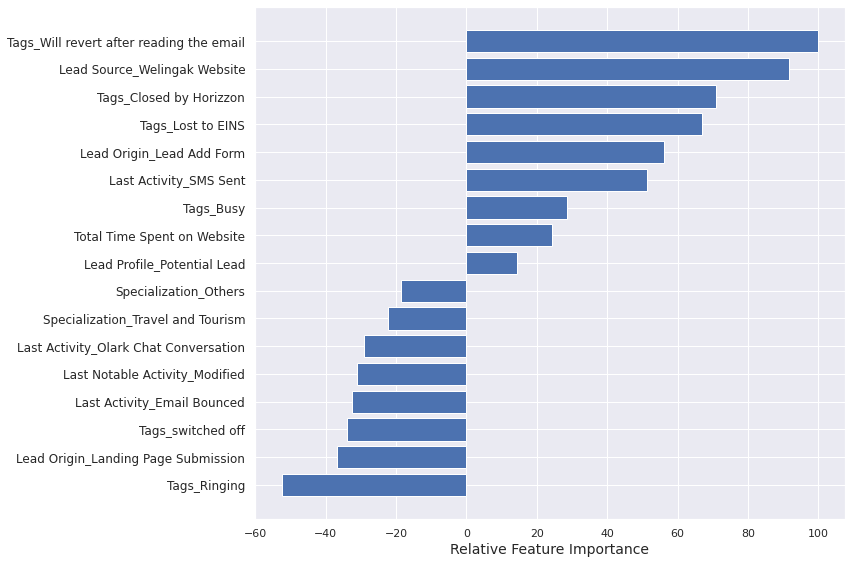

In [187]:
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize = (12,8))
ax = plt.subplot(1,1,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()

## Based on the above graph, it is clearly indicated that the following variables can help us to convert most of the Leads:
- Tags - Will Revert After Reading the Email
- Lead Source - Weblingak Website
- Tags - Closed by Horizon
- Tags - Lost to EINS
- Lead Origin - Lead Add Form
- Last Activity - SMS Sent

## However, the following will have the negative impact on the Lead Conversion rate:
- Tags - Ringing.
- Lead Origin - Landing Page Submission.
- Tags - Switched Off.
- Last Activity - Email Bounced.
- Last Activity - Olark Chat Conversation.

## *******************End of Assignment*******************